In [40]:
# using 'shop_all_history.csv i want to find how many users with different devices did shop have per week
# and evaluate whether the number of additions to the cart depends on the number of unique users

In [41]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from datetime import timedelta

In [54]:
# reading xlsx file
# all data is in one column
df = pd.read_excel('shop_all_history.xlsx')
df.shape

(748134, 1)

In [ ]:
# here i made new df with splitting data by ','
df2 = pd.DataFrame(df.iloc[:,0].str.split(',').values.tolist())
df2.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18
0,4214259466202417480,1476492957,2020-10-14 00:00:00+00:00,desktop,False,Windows,Internet Explorer,United States,not available in demo dataset,ask,organic,(not set),0,1.0,2.0,2.0,16.0,0.0,0.0
1,3541738396641160713,1493611205,2021-04-30 00:00:00+00:00,desktop,False,Windows,Chrome,United States,not available in demo dataset,ask,organic,(not set),0,1.0,1.0,1.0,0.0,0.0,0.0
2,8276557623242379934,1490071147,2021-03-20 00:00:00+00:00,desktop,False,Windows,Chrome,Australia,Brisbane,ask,organic,(not set),0,1.0,2.0,2.0,16.0,0.0,0.0
3,5855313117666192014,1491048053,2021-04-01 00:00:00+00:00,desktop,False,Windows,Chrome,Australia,Sydney,ask,organic,(not set),0,1.0,1.0,1.0,0.0,0.0,0.0
4,2619633492044211273,1495292376,2021-05-20 00:00:00+00:00,desktop,False,Windows,Chrome,United States,not available in demo dataset,ask,organic,(not set),0,1.0,15.0,12.0,326.0,1.0,1.0


In [ ]:
# giving names to columns
columns = ['fullVisitorId','visitStartTime','date','deviceCategory',
           'isMobile','operatingSystem','browser','country','city','trafficSource',
           'trafficMedium','trafficCampaign','isFirstVisit','totalVisits','totalHits',
           'totalPageviews','totalTimeOnSite','productPagesViewed','addedToCart']
df2.columns = columns
df = df2


In [45]:
# since date is by day i need to find weeks
df['date'] = pd.to_datetime(df['date'])
df['weekly_date'] = df['date'] - df['date'].dt.weekday.apply(timedelta)

In [46]:
# unique users by device weekly
df_weekly_uniqs = df.groupby(['weekly_date', 'deviceCategory'], as_index=False)[['fullVisitorId']].nunique()
# .nunique() is agg function that returns counts of unique elements
df_weekly_uniqs = df_weekly_uniqs.rename(columns={'fullVisitorId': 'unique_users'})
df_weekly_uniqs

,weekly_date,deviceCategory,unique_users
0,2020-07-27 00:00:00+00:00,desktop,2776
1,2020-07-27 00:00:00+00:00,mobile,532
2,2020-07-27 00:00:00+00:00,tablet,89
3,2020-08-03 00:00:00+00:00,desktop,12355
4,2020-08-03 00:00:00+00:00,mobile,2276
...,...,...,...
130,2021-05-24 00:00:00+00:00,mobile,3348
131,2021-05-24 00:00:00+00:00,tablet,483
132,2021-05-31 00:00:00+00:00,desktop,1432
133,2021-05-31 00:00:00+00:00,mobile,531


In [47]:
# taking only mobile users
df_wu_mobile = df_weekly_uniqs[df_weekly_uniqs['deviceCategory'] == 'mobile']
df_wu_mobile.sort_values('unique_users', ascending=False).head(5)

,weekly_date,deviceCategory,unique_users
61,2020-12-14 00:00:00+00:00,mobile,4539
118,2021-04-26 00:00:00+00:00,mobile,4504
58,2020-12-07 00:00:00+00:00,mobile,4006
127,2021-05-17 00:00:00+00:00,mobile,3983
76,2021-01-18 00:00:00+00:00,mobile,3937


<Axes: xlabel='weekly_date', ylabel='unique_users'>

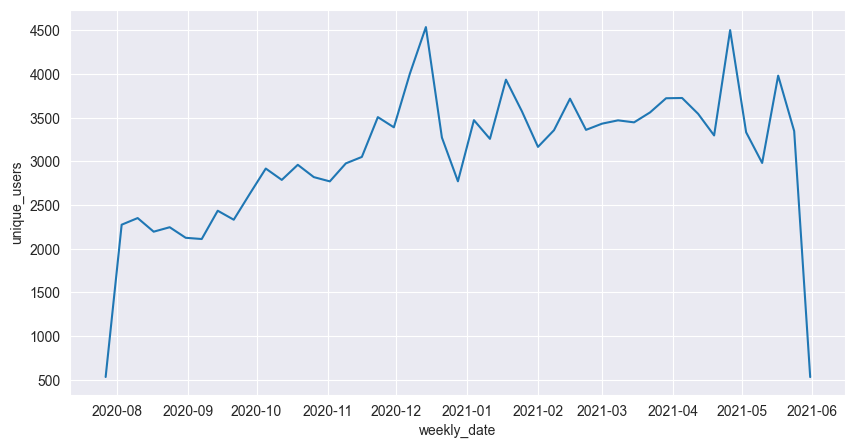

In [48]:
# making line chart
plt.figure(figsize=(10, 5))
sns.set_style('darkgrid')
sns.lineplot(data=df_wu_mobile, x='weekly_date', y='unique_users')

<Axes: xlabel='weekly_date', ylabel='unique_users'>

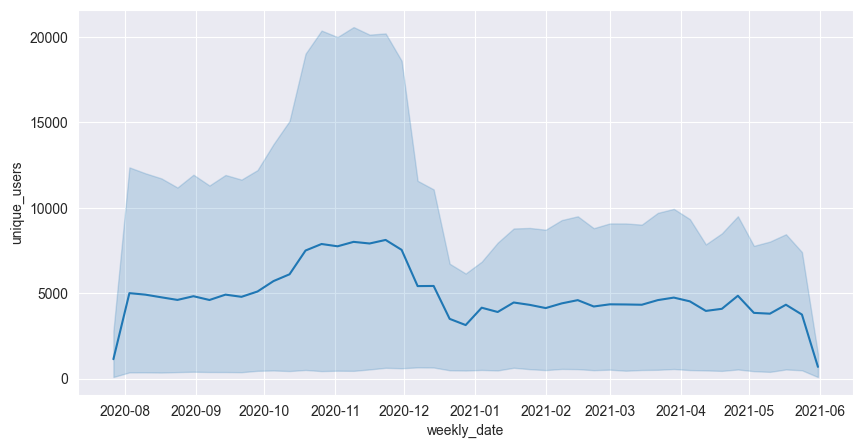

In [49]:
# if i dont filter by device line chart will look like this
plt.figure(figsize=(10, 5))
sns.lineplot(df_weekly_uniqs, x='weekly_date', y='unique_users')

In [50]:
# that line is mean number of users per each device
# shadow is confidence interval between each device type

<Axes: xlabel='weekly_date', ylabel='unique_users'>

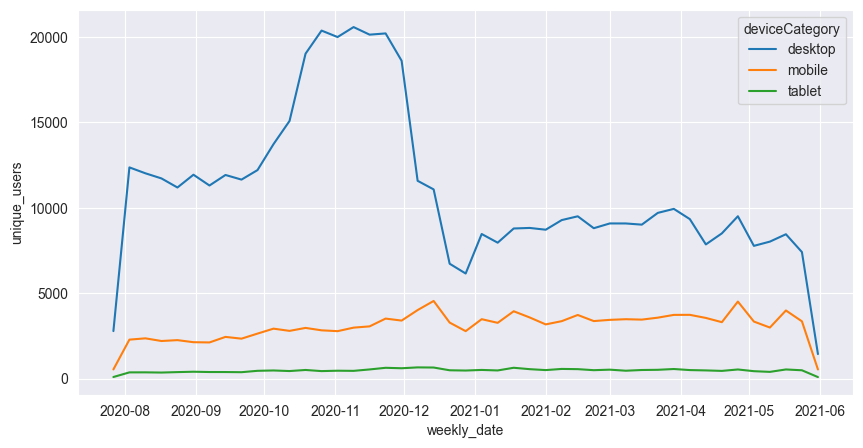

In [51]:
# i can also use ungrouped data (no specific device), but i can add lines for each device category
plt.figure(figsize=(10, 5))
sns.lineplot(df_weekly_uniqs, x='weekly_date', y='unique_users', hue='deviceCategory')